In [52]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def show_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

    plt.show()

In [54]:
df = pd.read_csv('Output/features.csv')
df

,file,stft_mean,stft_var,rms_mean,rms_var,cent_mean,cent_var,spec_bw_mean,spec_bw_var,rolloff_mean,...,mfcc_19_var,mfcc_0-4_mean,mfcc_0-4_var,mfcc_5-9_mean,mfcc_5-9_var,mfcc_10-14_mean,mfcc_10-14_var,mfcc_15-19_mean,mfcc_15-19_var,genre
0,blues.00091.wav,0.422259,0.092752,0.099364,0.001285,991.486589,4.159698e+05,1396.653097,262398.142890,1943.725473,...,40.245258,-7.785145,18489.712891,8.862488,154.827057,-1.695899,77.798355,-3.234428,43.192730,blues
1,blues.00071.wav,0.305165,0.080067,0.120498,0.000327,2429.004094,9.774405e+04,2286.767132,25016.954744,5065.090666,...,40.244335,2.145038,4448.955078,2.689909,309.222687,-5.189119,182.887970,-0.833443,83.087822,blues
2,blues.00094.wav,0.376682,0.095909,0.140944,0.005366,1239.633448,5.268485e+05,1660.269704,232947.480887,2519.268190,...,56.607864,-2.665824,13959.862305,6.400186,195.575729,-2.208013,95.361237,-1.318584,75.563797,blues
3,blues.00002.wav,0.363538,0.085257,0.175473,0.002751,1552.832481,1.564710e+05,1747.754087,76295.413398,3042.410115,...,30.653151,7.661862,6850.140625,4.331928,309.140594,-5.308488,101.441887,-2.554829,54.229572,blues
4,blues.00025.wav,0.290948,0.091065,0.089166,0.003114,1109.320763,1.386901e+05,1463.110786,37662.210097,2243.316778,...,67.647720,-6.604343,18049.724609,2.458843,115.234642,0.920388,104.367477,-1.098007,83.786308,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,pop.00094.wav,0.332986,0.086064,0.198588,0.007012,2806.873513,8.091829e+05,2858.235592,278813.451439,6104.063554,...,54.924786,14.293463,2488.781982,2.607012,120.954544,-1.451060,75.409279,0.904290,80.715065,pop
995,pop.00090.wav,0.353192,0.089734,0.194029,0.002238,3603.816900,9.363822e+05,3334.330761,110668.880739,7960.298939,...,41.335308,14.332676,1744.115601,3.200181,102.344749,-4.968098,65.940315,-0.117251,61.462692,pop
996,pop.00024.wav,0.411107,0.097134,0.207414,0.008897,3301.092985,7.982225e+05,3175.464127,125804.761347,7301.571110,...,96.332115,9.811527,2128.905029,6.280548,127.569801,-0.034675,69.587128,0.499132,95.170280,pop
997,pop.00036.wav,0.394622,0.089504,0.256515,0.007127,2944.414729,1.255014e+06,3162.449254,213961.543431,6878.242992,...,71.984047,18.941845,2712.746582,4.663253,123.720131,2.453747,50.236805,0.442806,69.271614,pop


In [55]:
df.drop(columns=['file'], inplace=True)

In [56]:
labels = df.pop('genre')
labels

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
994      pop
995      pop
996      pop
997      pop
998      pop
Name: genre, Length: 999, dtype: object

In [57]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
df_scaled

,stft_mean,stft_var,rms_mean,rms_var,cent_mean,cent_var,spec_bw_mean,spec_bw_var,rolloff_mean,rolloff_var,...,mfcc_19_mean,mfcc_19_var,mfcc_0-4_mean,mfcc_0-4_var,mfcc_5-9_mean,mfcc_5-9_var,mfcc_10-14_mean,mfcc_10-14_var,mfcc_15-19_mean,mfcc_15-19_var
0,0.532062,0.827693,-0.479334,-0.486237,-1.691912,-0.134358,-1.607801,1.301565,-1.670092,0.304667,...,-0.700176,-0.659718,-0.241539,1.004413,0.982468,-0.623874,-0.002433,-0.633287,-0.775630,-1.007895
1,-0.902153,-0.811632,-0.157361,-0.749921,0.316584,-0.928528,0.083616,-1.161878,0.312636,-1.131430,...,1.069688,-0.659739,0.353577,-0.580998,-0.283926,0.427027,-1.060569,1.473030,0.116130,0.147722
2,-0.026178,1.235559,0.154147,0.637111,-1.345202,0.142353,-1.106870,0.995938,-1.304501,0.689033,...,0.144710,-0.297895,0.065262,0.492925,0.477291,-0.346516,-0.157558,-0.281274,-0.064058,-0.070222
3,-0.187180,-0.140956,0.680195,-0.082735,-0.907601,-0.781968,-0.940630,-0.629731,-0.972195,-0.743801,...,-0.297867,-0.871827,0.684200,-0.309868,0.052958,0.426468,-1.096727,-0.159399,-0.523217,-0.688197
4,-1.076292,0.609569,-0.634699,0.017311,-1.527274,-0.826342,-1.481517,-1.030651,-1.479788,-0.705804,...,0.147495,-0.053773,-0.170773,0.954732,-0.331333,-0.893361,0.790070,-0.100761,0.017868,0.167955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-0.561398,-0.036577,1.032353,1.090182,0.844542,0.846952,1.169535,1.471916,0.972604,1.582897,...,0.488932,-0.335113,1.081632,-0.802331,-0.300934,-0.854428,0.071732,-0.681172,0.761549,0.078992
995,-0.313904,0.437667,0.962893,-0.223795,1.958029,1.164393,2.074223,-0.273018,2.151706,-0.169671,...,0.241563,-0.635614,1.083982,-0.886415,-0.179236,-0.981097,-0.993619,-0.870959,0.382134,-0.478680
996,0.395470,1.393924,1.166817,1.608964,1.535064,0.819599,1.772340,-0.115944,1.733274,0.350107,...,0.532346,0.580519,0.813030,-0.842966,0.452745,-0.809401,0.500771,-0.797865,0.611068,0.497707
997,0.193554,0.407942,1.914861,1.121792,1.036714,1.959576,1.747609,0.798910,1.464371,1.634343,...,0.693047,0.042115,1.360209,-0.777042,0.120934,-0.835604,1.254542,-1.185705,0.590148,-0.252484


In [58]:
le = LabelEncoder()
encoded_y = le.fit_transform(labels)
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,

In [59]:
one_hot = OneHotEncoder()

one_hot_y = one_hot.fit_transform(np.array(labels).reshape(-1, 1)).toarray()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, one_hot_y, test_size=0.2, random_state=42)

## modele z one-hot encoding

Random Forest
0.37


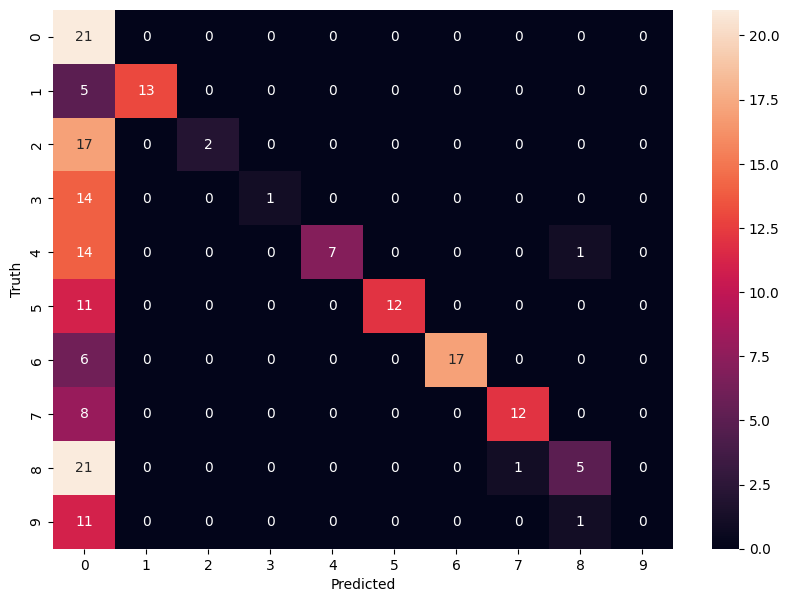

In [61]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest')
print(accuracy_score(y_test, y_pred))


show_cm(y_test.argmax(axis=1), y_pred.argmax(axis=1))

KNN
0.55


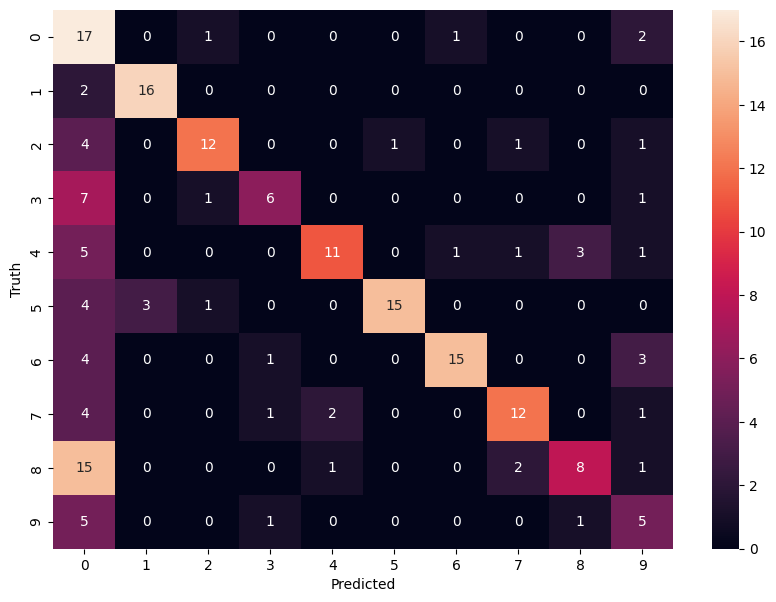

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('KNN')
print(accuracy_score(y_test, y_pred))

show_cm(y_test.argmax(axis=1), y_pred.argmax(axis=1))

## modele ze standardowym encodingiem

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, encoded_y, test_size=0.2, random_state=42, shuffle=True)

SVM
0.715


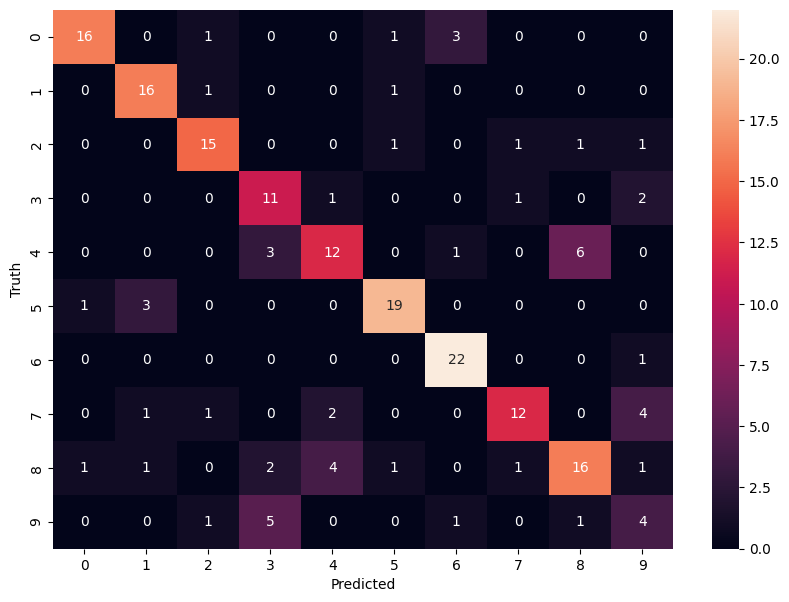

In [64]:
import xgboost as xgb
from sklearn.svm import SVC


svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('SVM')
print(accuracy_score(y_test, y_pred))

show_cm(y_test, y_pred)

XGBoost
0.64


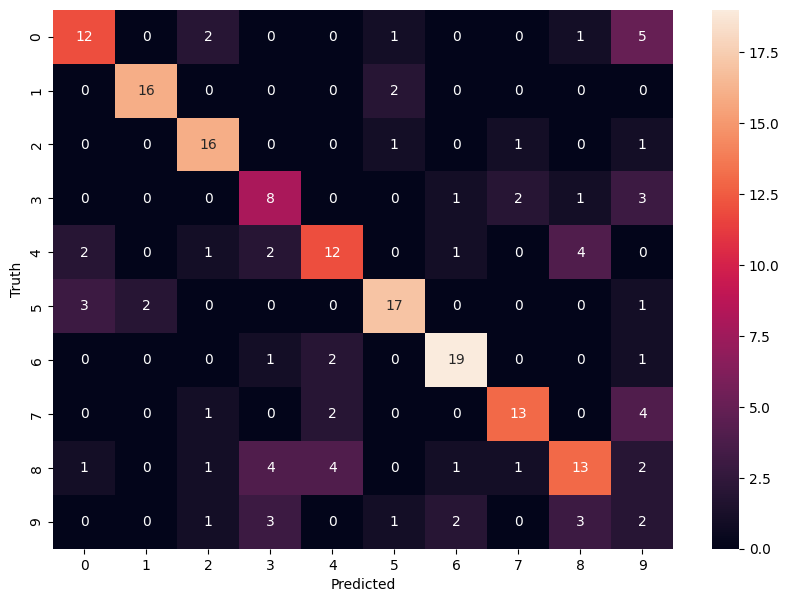

In [65]:
xgb_model = xgb.XGBClassifier(objective="multi:softmax", n_estimators=500)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('XGBoost')
print(accuracy_score(y_test, y_pred))

show_cm(y_test, y_pred)

Random Forest
0.695


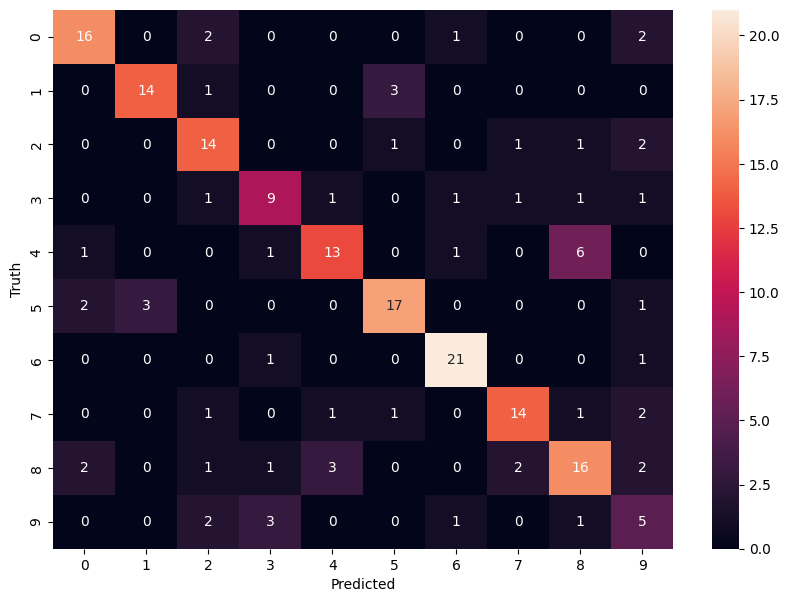

In [66]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest')
print(accuracy_score(y_test, y_pred))

show_cm(y_test, y_pred)